In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, f1_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold

sns.set(style="whitegrid")

In [3]:
data_path = "C:\\Users\\debmishra\\OneDrive - Sopra Steria\\Documents\\loan-train.csv"

df = pd.read_csv(data_path)

print("Training Data:")
df.head()

Training Data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(f"Training Data Shape: {df.shape}")

print("\nTraining Data Info:")
df.info()

Training Data Shape: (614, 13)

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
print("Missing values before imputation:")
df.isnull().sum()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numerical column LoanAmount with median
df.fillna({'LoanAmount': df['LoanAmount'].median()}, inplace=True)


print("\nMissing values after imputation:")
df.isnull().sum()

Missing values before imputation:

Missing values after imputation:


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

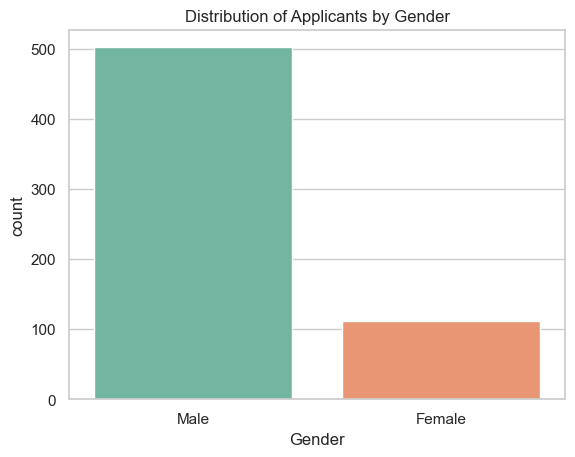

In [7]:
sns.countplot(data=df, x='Gender', hue='Gender', palette='Set2')
plt.title("Distribution of Applicants by Gender")
plt.show()


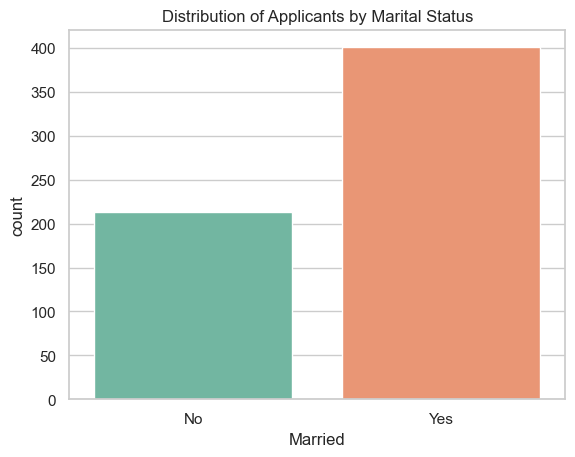

In [8]:
sns.countplot(data=df, x='Married', hue='Married', palette='Set2')
plt.title("Distribution of Applicants by Marital Status")
plt.show()

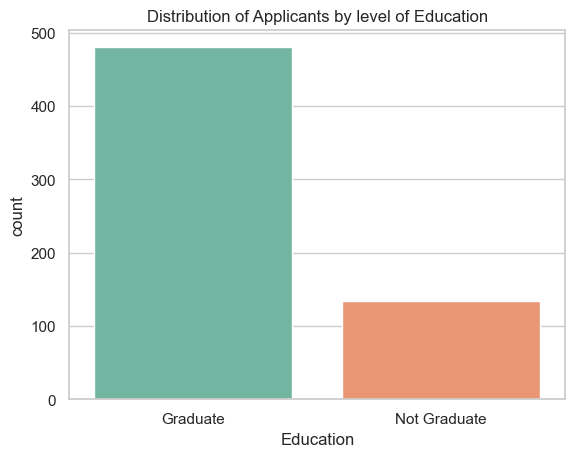

In [9]:
sns.countplot(data=df, x='Education', hue='Education', palette='Set2')
plt.title("Distribution of Applicants by level of Education")
plt.show()

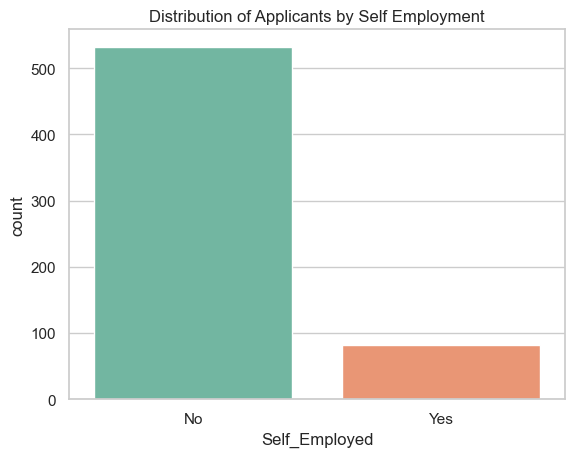

In [10]:
sns.countplot(data=df, x='Self_Employed', hue='Self_Employed', palette='Set2')
plt.title("Distribution of Applicants by Self Employment")
plt.show()

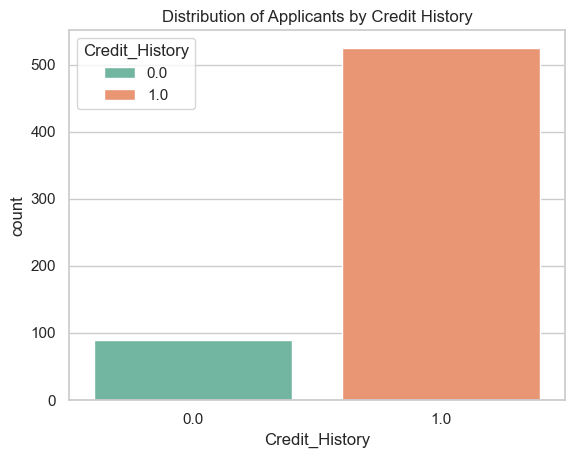

In [11]:
sns.countplot(data=df, x='Credit_History', hue='Credit_History', palette='Set2')
plt.title("Distribution of Applicants by Credit History")
plt.show()

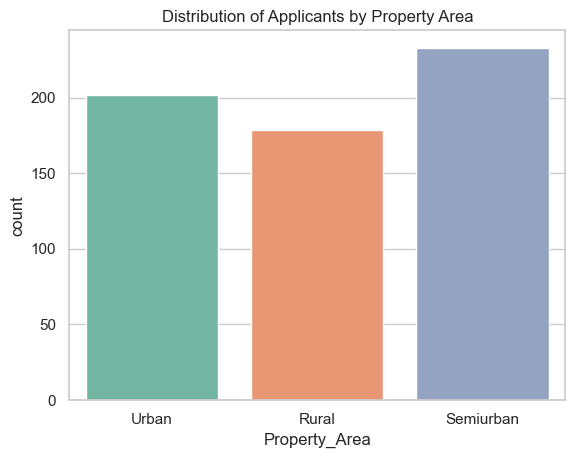

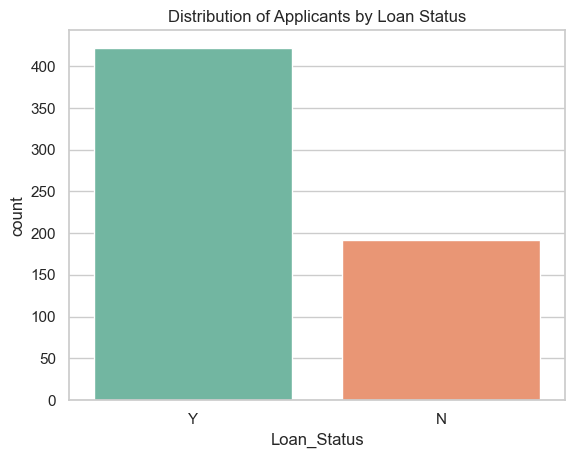

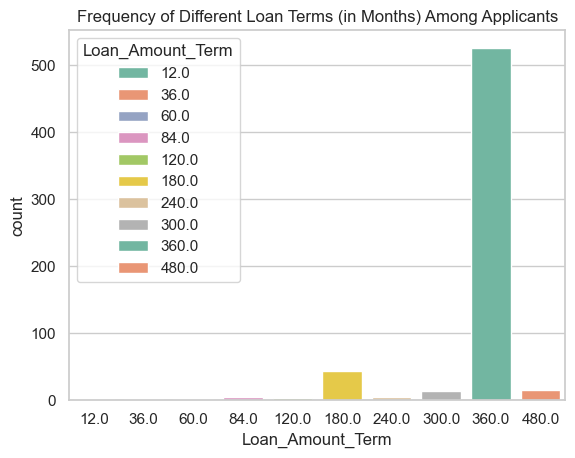

In [12]:
sns.countplot(data=df, x='Property_Area', hue='Property_Area', palette='Set2')
plt.title("Distribution of Applicants by Property Area")
plt.show()

sns.countplot(data=df, x='Loan_Status', hue='Loan_Status', palette='Set2')
plt.title("Distribution of Applicants by Loan Status")
plt.show()

sns.countplot(data=df, x='Loan_Amount_Term', hue='Loan_Amount_Term', palette='Set2')
plt.title("Frequency of Different Loan Terms (in Months) Among Applicants")
plt.show()

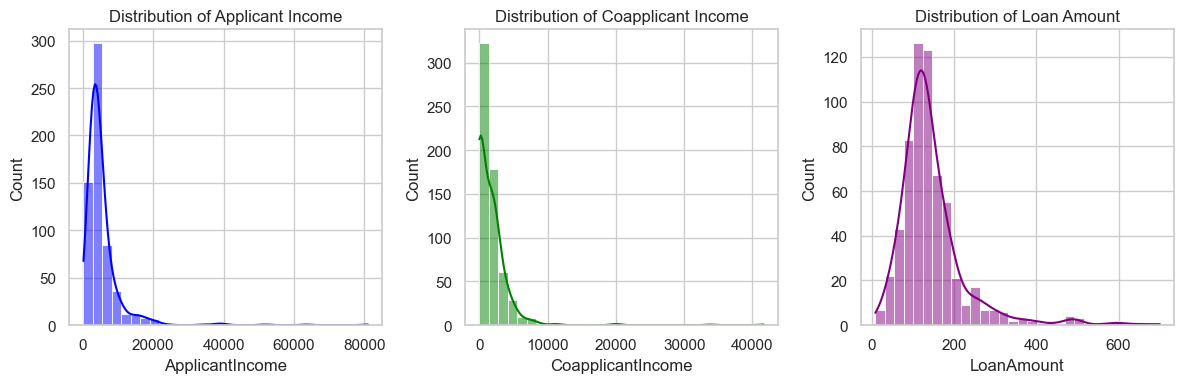

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title('Distribution of Applicant Income')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], kde=True, bins=30, color='green')
plt.title('Distribution of Coapplicant Income')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='purple')
plt.title('Distribution of Loan Amount')

plt.tight_layout()
plt.show()



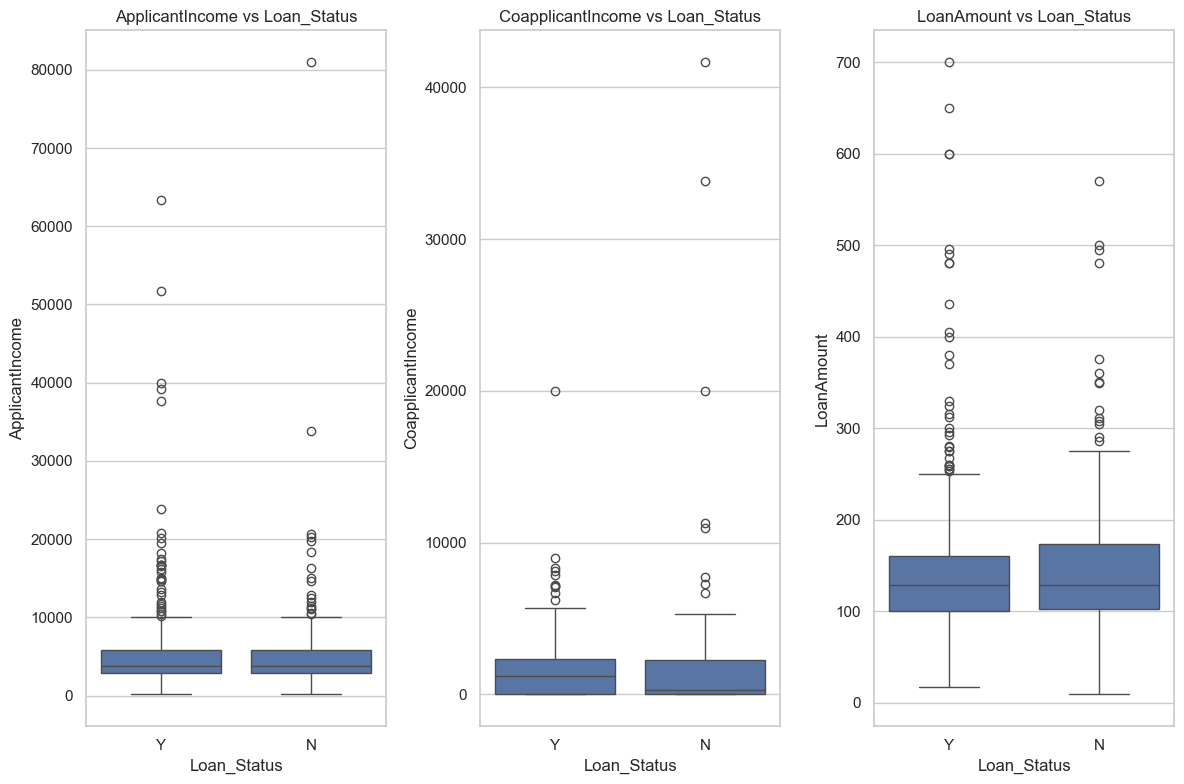

In [14]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col, x='Loan_Status')
    plt.title(f'{col} vs Loan_Status')
    
plt.tight_layout()    
plt.show()

In [15]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Log transform the LoanAmount and TotalIncome to reduce skewness
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])
df['TotalIncome_log'] = np.log1p(df['TotalIncome'])

# # Drop original income columns (optional)
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome'], axis=1, inplace=True)

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.859812,8.674197
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.859812,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.204693,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.795791,8.505525
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.955827,8.699681


In [16]:
# Encode target variable
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Use Label Encoding for binary categorical variables
label_enc_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Use One-Hot Encoding for multiclass categorical variables
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Convert boolean columns to int (0/1)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()


,Loan_ID,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,360.0,1.0,1,4.859812,8.674197,0,0,0,0,1
1,LP001003,1,1,0,0,360.0,1.0,0,4.859812,8.714732,1,0,0,0,0
2,LP001005,1,1,0,1,360.0,1.0,1,4.204693,8.006701,0,0,0,0,1
3,LP001006,1,1,1,0,360.0,1.0,1,4.795791,8.505525,0,0,0,0,1
4,LP001008,1,0,0,0,360.0,1.0,1,4.955827,8.699681,0,0,0,0,1


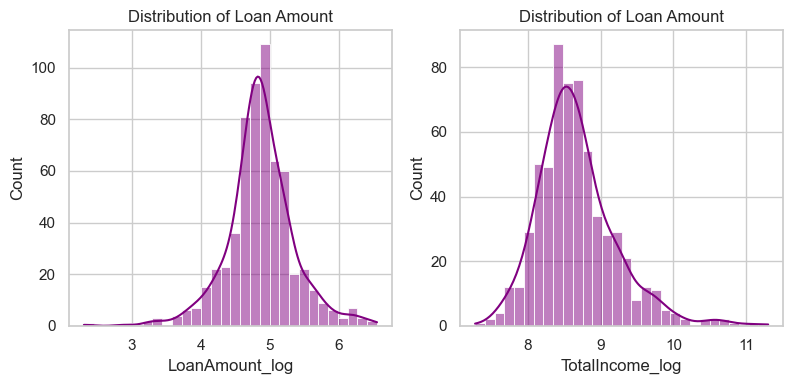

In [17]:
plt.figure(figsize=(12,4))
# plt.subplot(1, 3, 1)
# sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='blue')
# plt.title('Distribution of Applicant Income')

# plt.subplot(1, 3, 2)
# sns.histplot(df['CoapplicantIncome'], kde=True, bins=30, color='green')
# plt.title('Distribution of Coapplicant Income')

plt.subplot(1, 3, 1)
sns.histplot(df['LoanAmount_log'].dropna(), kde=True, bins=30, color='purple')
plt.title('Distribution of Loan Amount')

plt.subplot(1, 3, 2)
sns.histplot(df['TotalIncome_log'].dropna(), kde=True, bins=30, color='purple')
plt.title('Distribution of Loan Amount')



plt.tight_layout()
plt.show()

In [18]:
# Select features for scaling
# scale_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scale_cols = ['TotalIncome_log', 'LoanAmount_log', 'Loan_Amount_Term']

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome_log,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.74359,1.0,1,0.601711,0.347520,0,0,0,0,1
1,LP001003,1,1,0,0,0.74359,1.0,0,0.601711,0.357583,1,0,0,0,0
2,LP001005,1,1,0,1,0.74359,1.0,1,0.447563,0.181795,0,0,0,0,1
3,LP001006,1,1,1,0,0.74359,1.0,1,0.586647,0.305642,0,0,0,0,1
4,LP001008,1,0,0,0,0.74359,1.0,1,0.624304,0.353847,0,0,0,0,1


In [19]:
df.drop("Loan_ID", axis=1, inplace=True)

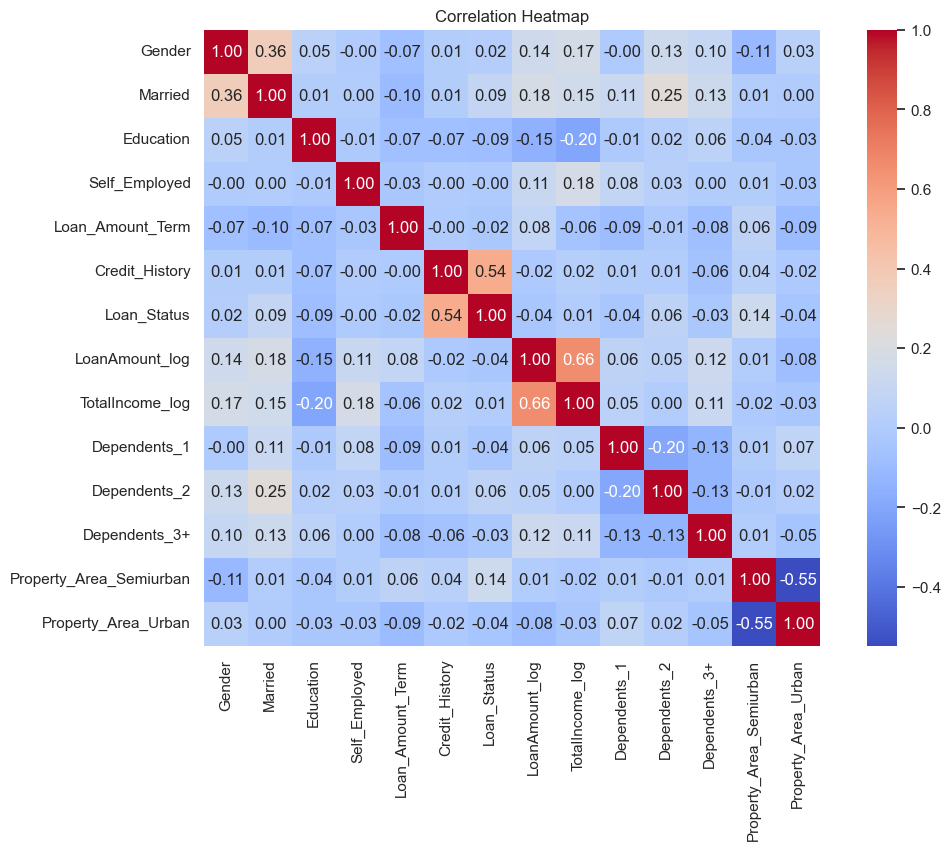

In [20]:
# --- Correlation Heatmap ---
corr_df = df.copy()  # df was the preprocessed version with encoding

# Drop non-numeric columns before correlation
# corr_df_numeric = corr_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split into train, validation and test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}; \t y_train shape: {y_train.shape}"),
print(f"X_val shape: {X_val.shape}; \t y_val shape: {y_val.shape}"),

X_train shape: (491, 13); 	 y_train shape: (491,)
X_val shape: (123, 13); 	 y_val shape: (123,)


(None,)

In [22]:
#MODELING
#Logistic Regression


In [23]:
def train_accuracy(model, name):
    y_pred = model.predict(X_train)

    print(f"--- {name} ---")
    print(f"Train Accuracy: {accuracy_score(y_train, y_pred):.4f}")

def val_predict(model, name):
    y_pred = model.predict(X_val)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("\n")

In [24]:
def evaluate_model_performance(model, X_data, y_data, name):
    y_pred = model.predict(X_data)
    y_prob = model.predict_proba(X_data)[:, 1] # Probability of the positive class (1)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_data, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_data, y_prob)}")
    print(f"F1-Score (Weighted): {f1_score(y_data, y_pred, average='weighted')}")
    print("Classification Report:")
    print(classification_report(y_data, y_pred))
    print("\n")
    

In [25]:
# --- Reusable Threshold Tuning Function ---
def perform_threshold_tuning(model, X_data, y_data, target_class_for_optimization, optimize_metric, model_name="Model"):
    """
    Performs threshold tuning for a given classification model.

    Args:
        model: Trained classification model with a .predict_proba() method.
        X_data (pd.DataFrame): Features for evaluation (e.g., X_val).
        y_data (pd.Series): True labels for evaluation (e.g., y_val).
        target_class_for_optimization (int): The class label (0 or 1) for which
                                             F1-score/recall is to be optimized.
        optimize_metric (str): 'f1' to maximize F1-score for the target class,
                               'recall' to maximize recall for the target class.
        model_name (str): A string name for the model for printing purposes.

    Returns:
        tuple: (pd.DataFrame, pd.Series) A DataFrame of results for each threshold
               and a Series representing the optimal threshold's row.
    """
    print(f"--- Threshold Tuning for {model_name} (Optimizing {optimize_metric.upper()}-Score for Class {target_class_for_optimization}) ---")

    y_probs = model.predict_proba(X_data)[:, 1] # Probabilities for the positive class (1)

    thresholds = np.linspace(0.01, 0.99, 100) # Increased range and points for finer tuning
    results = []

    for threshold in thresholds:
        y_pred_tuned = (y_probs >= threshold).astype(int)

        # Calculate metrics for the target class
        current_recall = recall_score(y_data, y_pred_tuned, pos_label=target_class_for_optimization, zero_division=0)
        current_precision = precision_score(y_data, y_pred_tuned, pos_label=target_class_for_optimization, zero_division=0)
        current_f1 = f1_score(y_data, y_pred_tuned, pos_label=target_class_for_optimization, zero_division=0)

        # Overall metrics for context
        current_accuracy = accuracy_score(y_data, y_pred_tuned)
        current_roc_auc = roc_auc_score(y_data, y_probs) # ROC AUC is independent of threshold

        results.append({
            'threshold': threshold,
            'accuracy': current_accuracy,
            'recall_target': current_recall,
            'precision_target': current_precision,
            'f1_target': current_f1,
            'roc_auc': current_roc_auc
        })

    results_df = pd.DataFrame(results)

    if optimize_metric == 'f1':
        optimal_row = results_df.loc[results_df['f1_target'].idxmax()]
        print(f"\nThreshold for Max F1-Score of Class {target_class_for_optimization} for {model_name}:")
    elif optimize_metric == 'recall':
        optimal_row = results_df.loc[results_df['recall_target'].idxmax()]
        print(f"\nThreshold for Max Recall of Class {target_class_for_optimization} for {model_name}:")
    else:
        raise ValueError("optimize_metric must be 'f1' or 'recall'")

    print(optimal_row)

    print(f"\nSample of Threshold Tuning Results ({model_name} Validation Set):")
    print(results_df[['threshold', 'accuracy', 'recall_target', 'precision_target', 'f1_target']].round(4).to_string())

    return results_df, optimal_row

In [26]:
# --- Plotting function (now separated for reusability) ---
def plot_threshold_tradeoff(results_df, optimal_threshold_row, model_name="Model", optimize_metric="F1-Score"):
    """
    Plots the trade-off between threshold and various performance metrics.

    Args:
        results_df (pd.DataFrame): DataFrame containing threshold tuning results.
        optimal_threshold_row (pd.Series): Row from results_df representing the optimal threshold.
        model_name (str): Name of the model for the plot title.
        optimize_metric (str): The metric that was optimized ('F1-Score', 'Recall').
    """
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='threshold', y='recall_target', data=results_df, label='Recall (Target Class)', marker='o', markersize=4)
    sns.lineplot(x='threshold', y='precision_target', data=results_df, label='Precision (Target Class)', marker='o', markersize=4)
    sns.lineplot(x='threshold', y='f1_target', data=results_df, label='F1-Score (Target Class)', marker='o', markersize=4)
    sns.lineplot(x='threshold', y='accuracy', data=results_df, label='Overall Accuracy', marker='o', markersize=4, linestyle='--')

    plt.axvline(x=optimal_threshold_row['threshold'], color='green', linestyle='--',
                label=f'Max {optimize_metric} Threshold: {optimal_threshold_row["threshold"]:.4f}')
    plt.axvline(x=0.5, color='gray', linestyle=':', label='Default Threshold (0.5)')

    plt.title(f'Threshold vs. Performance Metrics for {model_name} (Validation Set) - Optimized for {optimize_metric}(Target Class)')
    plt.xlabel('Prediction Threshold (for Class 1)')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show();

In [27]:
# --- New Reusable Function for Evaluating Tuned Predictions ---
def evaluate_tuned_predictions(y_true, y_pred, y_prob=None, name="Tuned Model"):
    """
    Evaluates classification predictions from a tuned threshold.

    Args:
        y_true (pd.Series or np.array): True labels.
        y_pred (pd.Series or np.array): Predicted labels after thresholding.
        y_prob (pd.Series or np.array, optional): Predicted probabilities for the positive class (1).
                                                 Required for ROC AUC calculation.
        name (str): A string name for the evaluation report.
    """
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    if y_prob is not None:
        try:
            roc_auc = roc_auc_score(y_true, y_prob)
            print(f"ROC AUC Score: {roc_auc:.4f}")
        except Exception as e:
            print(f"Warning: Could not calculate ROC AUC score for tuned predictions. Error: {e}")
            print("ROC AUC Score: N/A")
    else:
        print("ROC AUC Score: N/A (y_prob not provided)")

    print(f"F1-Score (Weighted): {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

In [28]:
param_grid_lr = {
    'C': np.logspace(-3, 3, 7), # Inverse of regularization strength: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    'penalty': ['l1', 'l2'],    # L1 (Lasso) and L2 (Ridge) regularization
    'solver': ['liblinear', 'saga'], # Solvers that support both l1 and l2 penalties
    'class_weight': [None, 'balanced'] # 'balanced' automatically adjusts weights
}

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with StratifiedKFold for cross-validation on imbalanced data
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Stratified K-Fold
grid_search_lr = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param_grid_lr,
    cv=cv_strategy, # Use stratified cross-validation
    scoring="f1_macro",
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Logistic Regression with Imbalance Handling...")
grid_search_lr.fit(X_train, y_train)

print("\nGridSearchCV for Logistic Regression completed.")
print(f"Best parameters found: {grid_search_lr.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search_lr.best_score_}")

# Get the best model
best_logistic_regression_model = grid_search_lr.best_estimator_

Starting GridSearchCV for Logistic Regression with Imbalance Handling...
Fitting 5 folds for each of 56 candidates, totalling 280 fits

GridSearchCV for Logistic Regression completed.
Best parameters found: {'C': np.float64(0.1), 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation ROC AUC: 0.7074062175041016


In [29]:
# Evaluate the best model on the TRAIN set
evaluate_model_performance(best_logistic_regression_model, X_train, y_train, 'Best Logistic Regression (Train)')

# Evaluate the best model on the VALIDATION set
evaluate_model_performance(best_logistic_regression_model, X_val, y_val, "Best Logistic Regression (Validation)")

--- Best Logistic Regression (Train) ---
Accuracy: 0.7983706720977597
ROC AUC Score: 0.7322632856757486
F1-Score (Weighted): 0.7702089123720854
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



--- Best Logistic Regression (Validation) ---
Accuracy: 0.8536585365853658
ROC AUC Score: 0.8374613003095975
F1-Score (Weighted): 0.8404405979543665
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123





In [30]:
# Perform threshold tuning for Logistic Regression, optimizing F1-score for class 0
lr_results_df, optimal_lr_threshold_row = perform_threshold_tuning(
    model=best_logistic_regression_model,
    X_data=X_val,
    y_data=y_val,
    target_class_for_optimization=0, # Class 'No'
    optimize_metric='f1', # Optimize for F1-score
    model_name='Logistic Regression'
)

--- Threshold Tuning for Logistic Regression (Optimizing F1-Score for Class 0) ---

Threshold for Max F1-Score of Class 0 for Logistic Regression:
threshold           0.267374
accuracy            0.853659
recall_target       0.552632
precision_target    0.954545
f1_target           0.700000
roc_auc             0.837461
Name: 26, dtype: float64

Sample of Threshold Tuning Results (Logistic Regression Validation Set):
    threshold  accuracy  recall_target  precision_target  f1_target
0      0.0100    0.6911         0.0000            0.0000     0.0000
1      0.0199    0.6911         0.0000            0.0000     0.0000
2      0.0298    0.6911         0.0000            0.0000     0.0000
3      0.0397    0.6911         0.0000            0.0000     0.0000
4      0.0496    0.6911         0.0000            0.0000     0.0000
5      0.0595    0.6911         0.0000            0.0000     0.0000
6      0.0694    0.6911         0.0000            0.0000     0.0000
7      0.0793    0.6911         0.00

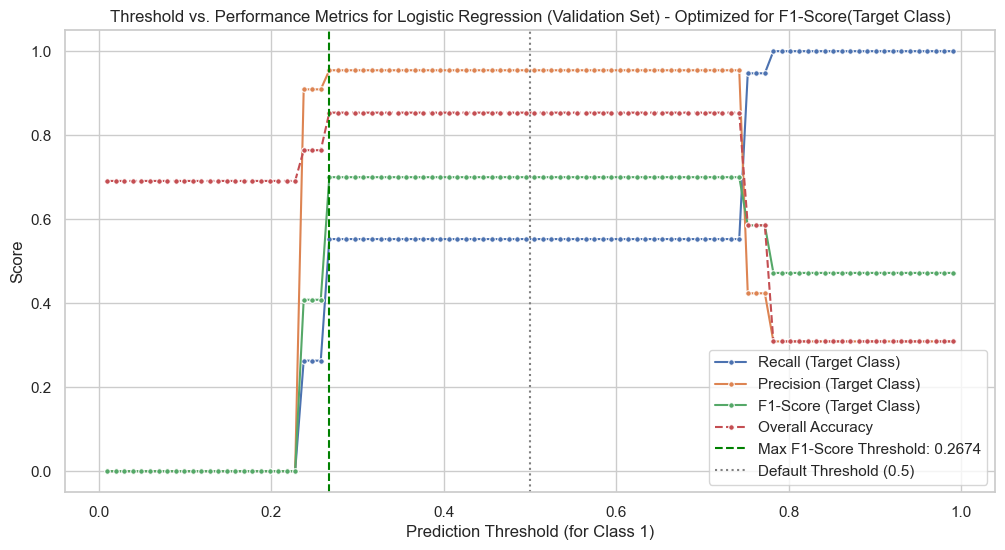

In [31]:
# Plot the results
plot_threshold_tradeoff(
    results_df=lr_results_df,
    optimal_threshold_row=optimal_lr_threshold_row,
    model_name='Logistic Regression',
    optimize_metric='F1-Score'
)

In [32]:
optimal_lr_threshold_for_deployment = optimal_lr_threshold_row['threshold']
y_probs_val_lr_final = best_logistic_regression_model.predict_proba(X_val)[:, 1]
y_pred_lr_final_optimized = (y_probs_val_lr_final >= optimal_lr_threshold_for_deployment).astype(int)

evaluate_tuned_predictions(
    y_true=y_val,
    y_pred=y_pred_lr_final_optimized,
    y_prob=y_probs_val_lr_final,
    name=f"Final Logistic Regression (Validation) with Threshold {optimal_lr_threshold_for_deployment:.4f}"
)

--- Final Logistic Regression (Validation) with Threshold 0.2674 ---
Accuracy: 0.8537
ROC AUC Score: 0.8375
F1-Score (Weighted): 0.8404
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123





In [33]:
#KNN

In [34]:
# Hyperparameter Tuning for KNN with GridSearchCV
# n_neighbors: The number of neighbors to consider (odd numbers often preferred to avoid ties)
# weights: 'uniform' (all neighbors contribute equally) or 'distance' (closer neighbors contribute more)
# metric: Distance metric to use ('euclidean' is default, 'manhattan' or 'minkowski' can be explored)
param_grid_knn = {
    'n_neighbors': list(range(11, 51, 2)), # Try odd numbers from 3 to 19
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] # Common distance metrics
}

knn_classifier = KNeighborsClassifier()

# Use StratifiedKFold for cross-validation on imbalanced data
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_knn = GridSearchCV(
    estimator=knn_classifier,
    param_grid=param_grid_knn,
    cv=cv_strategy,
    scoring='f1_macro', # Optimize for ROC AUC, good for imbalanced data
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

print("Starting GridSearchCV for K-Nearest Neighbors...")
grid_search_knn.fit(X_train, y_train)

print("\nGridSearchCV for K-Nearest Neighbors completed.")
print(f"Best parameters found: {grid_search_knn.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search_knn.best_score_:.4f}")

# Get the best model
best_knn_model = grid_search_knn.best_estimator_

Starting GridSearchCV for K-Nearest Neighbors...
Fitting 5 folds for each of 80 candidates, totalling 400 fits

GridSearchCV for K-Nearest Neighbors completed.
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best cross-validation ROC AUC: 0.6396


In [35]:
# Evaluate the best model on the TRAIN set
evaluate_model_performance(best_knn_model, X_train, y_train, 'Best KNN (Train)')

# Evaluate the best model on the VALIDATION set
evaluate_model_performance(best_knn_model, X_val, y_val, "Best KNN (Validation)")

--- Best KNN (Train) ---
Accuracy: 1.0
ROC AUC Score: 1.0
F1-Score (Weighted): 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



--- Best KNN (Validation) ---
Accuracy: 0.7967479674796748
ROC AUC Score: 0.7894736842105263
F1-Score (Weighted): 0.7767046237488568
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.80      0.70      0.72       123
weighted avg       0.80      0.80      0.78       123





In [36]:
#Random Forest

In [37]:
# --- Random Forest Model Training and Tuning ---

# Hyperparameter Tuning for Random Forest with GridSearchCV
# n_estimators: Number of trees in the forest. More trees generally means better performance but slower training.
# max_features: The number of features to consider when looking for the best split.
# max_depth: The maximum depth of the tree. Limits the number of nodes in the tree.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
# class_weight: 'balanced' helps with imbalanced datasets.

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300], # Fewer estimators for quicker initial search
    'max_features': ['sqrt', 'log2', None], # Number of features to consider at each split
    'max_depth': [5, 8, 12, 15], # Max depth of trees, None means full depth
    'min_samples_split': [2, 5], # Min samples required to split a node
    'min_samples_leaf': [5, 10, 20], # Min samples required at a leaf node
    'class_weight': [None, 'balanced'] # Handle imbalance
}

rf_classifier = RandomForestClassifier(random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    cv=cv_strategy,
    scoring='f1_macro', # Optimize for ROC AUC as requested
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

print("Starting GridSearchCV for Random Forest Classifier...")
grid_search_rf.fit(X_train, y_train)

print("\nGridSearchCV for Random Forest Classifier completed.")
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search_rf.best_score_:.4f}")

# Get the best model
best_rf_model = grid_search_rf.best_estimator_


Starting GridSearchCV for Random Forest Classifier...
Fitting 5 folds for each of 576 candidates, totalling 2880 fits

GridSearchCV for Random Forest Classifier completed.
Best parameters found: {'class_weight': None, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation ROC AUC: 0.7108


In [38]:
# Evaluate the best model on the TRAIN set
evaluate_model_performance(best_rf_model, X_train, y_train, 'Best Random Forest (Train)')

# Evaluate the best model on the VALIDATION set
evaluate_model_performance(best_rf_model, X_val, y_val, "Best Random Forest (Validation)")

--- Best Random Forest (Train) ---
Accuracy: 0.8065173116089613
ROC AUC Score: 0.9292265597903581
F1-Score (Weighted): 0.7823761451792622
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       154
           1       0.79      0.98      0.87       337

    accuracy                           0.81       491
   macro avg       0.85      0.70      0.73       491
weighted avg       0.83      0.81      0.78       491



--- Best Random Forest (Validation) ---
Accuracy: 0.8536585365853658
ROC AUC Score: 0.8356037151702786
F1-Score (Weighted): 0.8404405979543665
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123





In [39]:
rf_results_df, optimal_rf_threshold_row = perform_threshold_tuning(
    model=best_rf_model,
    X_data=X_val,
    y_data=y_val,
    target_class_for_optimization=0, # Class 'No'
    optimize_metric='f1', # As specified in your original Random Forest tuning code
    model_name='Random Forest'
)

--- Threshold Tuning for Random Forest (Optimizing F1-Score for Class 0) ---

Threshold for Max F1-Score of Class 0 for Random Forest:
threshold           0.643535
accuracy            0.845528
recall_target       0.710526
precision_target    0.771429
f1_target           0.739726
roc_auc             0.835604
Name: 64, dtype: float64

Sample of Threshold Tuning Results (Random Forest Validation Set):
    threshold  accuracy  recall_target  precision_target  f1_target
0      0.0100    0.6911         0.0000            0.0000     0.0000
1      0.0199    0.6911         0.0000            0.0000     0.0000
2      0.0298    0.6911         0.0000            0.0000     0.0000
3      0.0397    0.6911         0.0000            0.0000     0.0000
4      0.0496    0.6911         0.0000            0.0000     0.0000
5      0.0595    0.6911         0.0000            0.0000     0.0000
6      0.0694    0.6911         0.0000            0.0000     0.0000
7      0.0793    0.6911         0.0000            0.00

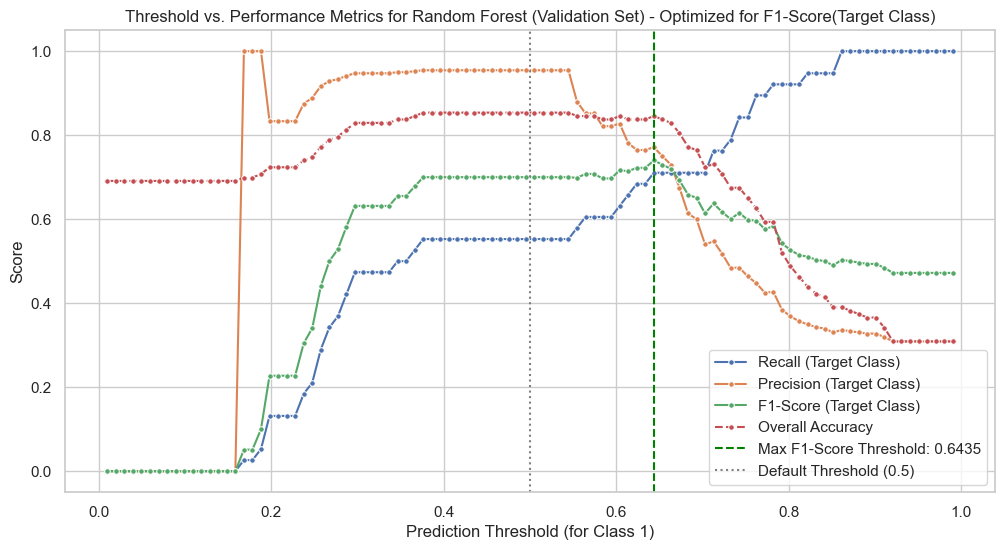

In [40]:
# Plot the results for Random Forest
plot_threshold_tradeoff(
    results_df=rf_results_df,
    optimal_threshold_row=optimal_rf_threshold_row,
    model_name='Random Forest',
    optimize_metric='F1-Score' # Updated plot label
)

In [41]:
# # optimal_rf_threshold_for_deployment = optimal_rf_threshold_row['threshold']
# y_pred_rf_final_optimized = (best_rf_model.predict_proba(X_val)[:, 1] >= optimal_rf_threshold_row).astype(int)
# print("\nFinal Classification Report for RF with Chosen Optimal Threshold (on Validation Set):")
# print(classification_report(y_val, y_pred_rf_final_optimized))
# print(f"Recall for 'No' (Class 0): {recall_score(y_val, y_pred_rf_final_optimized, pos_label=0):.4f}")
# print(f"Precision for 'No' (Class 0): {precision_score(y_val, y_pred_rf_final_optimized, pos_label=0):.4f}")

# Example of how to use the optimal threshold for final predictions:
optimal_rf_threshold_for_deployment = optimal_rf_threshold_row['threshold']
y_probs_val_rf_final = best_rf_model.predict_proba(X_val)[:, 1] # Get probabilities
y_pred_rf_final_optimized = (y_probs_val_rf_final >= optimal_rf_threshold_for_deployment).astype(int)

# Using the reusable evaluation function for the final predictions
evaluate_tuned_predictions(
    y_true=y_val,
    y_pred=y_pred_rf_final_optimized,
    y_prob=y_probs_val_rf_final, # Pass probabilities for ROC AUC
    name=f"Final Random Forest (Validation) with Threshold {optimal_rf_threshold_for_deployment:.4f}"
)

--- Final Random Forest (Validation) with Threshold 0.6435 ---
Accuracy: 0.8455
ROC AUC Score: 0.8356
F1-Score (Weighted): 0.8437
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        38
           1       0.88      0.91      0.89        85

    accuracy                           0.85       123
   macro avg       0.82      0.81      0.81       123
weighted avg       0.84      0.85      0.84       123





In [42]:
#Support Vector Machine

In [43]:
# Hyperparameter Tuning for SVC with GridSearchCV
# C: Regularization parameter. The strength of the regularization is inversely proportional to C.
#    Must be strictly positive.
# kernel: Specifies the kernel type to be used in the algorithm. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
# class_weight: 'balanced' helps with imbalanced datasets.

param_grid_svc = {
    'C': [0.1, 1, 10, 20, 30, 50, 70, 100], # Regularization parameter
    'kernel': ['rbf', 'linear'], # Common kernels to try
    'gamma': ['scale', 'auto'], # Kernel coefficient for rbf/poly/sigmoid
    'class_weight': [None, 'balanced'] # Handle imbalance
}

# IMPORTANT: probability=True is needed for roc_auc_score
svc_classifier = SVC(random_state=42, probability=True)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a custom scorer for recall of class 0 ('No' loan)
# recall_no_scorer = make_scorer(recall_score, pos_label=0) # pos_label=0 specifies that we want recall for class 0

grid_search_svc = GridSearchCV(
    estimator=svc_classifier,
    param_grid=param_grid_svc,
    cv=cv_strategy,
    scoring='f1_macro', # Optimize for ROC AUC as requested
    verbose=1,
    n_jobs=-1 # Use all available CPU cores
)

print("Starting GridSearchCV for Support Vector Machine Classifier...")
grid_search_svc.fit(X_train, y_train)

print("\nGridSearchCV for Support Vector Machine Classifier completed.")
print(f"Best parameters found: {grid_search_svc.best_params_}")
print(f"Best cross-validation ROC AUC: {grid_search_svc.best_score_:.4f}")

# Get the best model
best_svc_model = grid_search_svc.best_estimator_

Starting GridSearchCV for Support Vector Machine Classifier...
Fitting 5 folds for each of 64 candidates, totalling 320 fits

GridSearchCV for Support Vector Machine Classifier completed.
Best parameters found: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation ROC AUC: 0.7074


In [44]:
# Evaluate the best model on the TRAIN set
evaluate_model_performance(best_svc_model, X_train, y_train, 'Best SVC (Train)')

# Evaluate the best model on the VALIDATION set
evaluate_model_performance(best_svc_model, X_val, y_val, "Best SVC (Validation)")

--- Best SVC (Train) ---
Accuracy: 0.7983706720977597
ROC AUC Score: 0.6965393656788317
F1-Score (Weighted): 0.7702089123720854
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.40      0.55       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



--- Best SVC (Validation) ---
Accuracy: 0.8536585365853658
ROC AUC Score: 0.7421052631578947
F1-Score (Weighted): 0.8404405979543665
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123





In [45]:
svc_results_df, optimal_svc_threshold_row = perform_threshold_tuning(
    model=best_svc_model,
    X_data=X_val,
    y_data=y_val,
    target_class_for_optimization=0, # Class 'No'
    optimize_metric='f1', # As specified in your objective for SVC
    model_name='Support Vector Machine'
)

--- Threshold Tuning for Support Vector Machine (Optimizing F1-Score for Class 0) ---

Threshold for Max F1-Score of Class 0 for Support Vector Machine:
threshold           0.099091
accuracy            0.853659
recall_target       0.552632
precision_target    0.954545
f1_target           0.700000
roc_auc             0.742105
Name: 9, dtype: float64

Sample of Threshold Tuning Results (Support Vector Machine Validation Set):
    threshold  accuracy  recall_target  precision_target  f1_target
0      0.0100    0.6911         0.0000            0.0000      0.000
1      0.0199    0.6911         0.0000            0.0000      0.000
2      0.0298    0.6911         0.0000            0.0000      0.000
3      0.0397    0.6911         0.0000            0.0000      0.000
4      0.0496    0.6911         0.0000            0.0000      0.000
5      0.0595    0.6911         0.0000            0.0000      0.000
6      0.0694    0.6911         0.0000            0.0000      0.000
7      0.0793    0.6911     

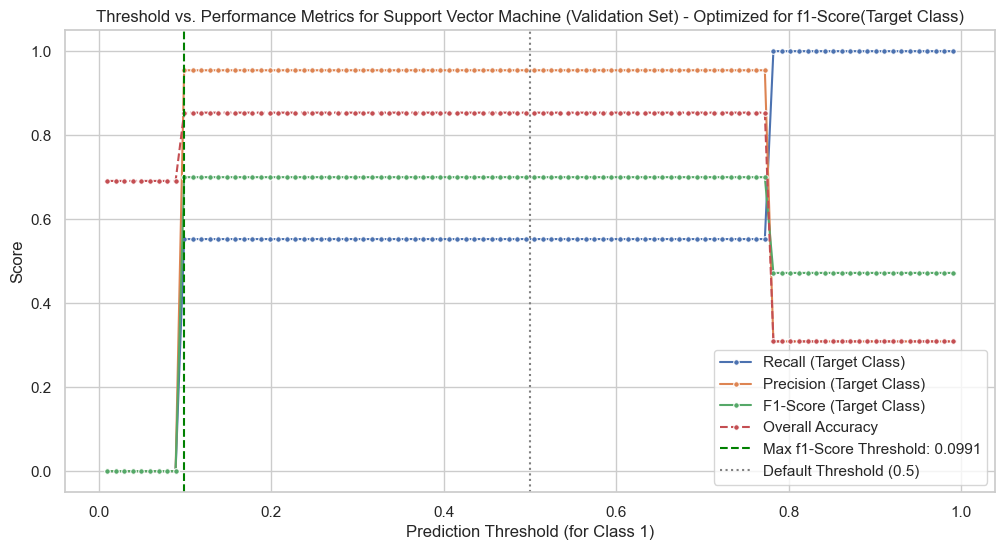

In [46]:
# Plot the results for SVC
plot_threshold_tradeoff(
    results_df=svc_results_df,
    optimal_threshold_row=optimal_svc_threshold_row,
    model_name='Support Vector Machine',
    optimize_metric='f1-Score' # Updated plot label
)

In [ ]:
optimal_svc_threshold_for_deployment = optimal_svc_threshold_row['threshold']
y_probs_val_svc_final = best_svc_model.predict_proba(X_val)[:, 1] # Get probabilities
y_pred_svc_final_optimized = (y_probs_val_svc_final >= optimal_svc_threshold_for_deployment).astype(int)


# Using the reusable evaluation function for the final predictions
evaluate_tuned_predictions(
        y_true=y_val,
        y_pred=y_pred_svc_final_optimized,
        y_prob=y_probs_val_svc_final, # Pass probabilities for ROC AUC
        name=f"Final SVC (Validation) with Threshold {optimal_svc_threshold_for_deployment:.4f}"
)

